In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib_inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [84]:
df1 = pd.read_csv("Mumbai1.csv")
df1.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [85]:
df1.shape

(6347, 19)

In [86]:
df1.groupby('Area')['Area'].agg('count')

Area
200     2
216     1
220     3
225     6
239     1
       ..
6381    1
6900    1
7000    1
7600    1
8511    1
Name: Area, Length: 1140, dtype: int64

In [87]:
df2 = df1.drop(['Landscaped Gardens','Jogging Track','Swimming Pool','Indoor Games','New/Resale','Gas Connection'],axis='columns')
df2.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom
0,0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0
1,1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0
2,2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1
3,3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1
4,4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1


In [88]:
df2.drop(columns=df2.columns[0], 
        axis=1, 
        inplace=True)

In [89]:
df2.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1


In [90]:
df2.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
dtype: int64

In [91]:
df3 = df2.dropna()
df3.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
dtype: int64

In [92]:
df3.shape

(6347, 12)

In [93]:
df3['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7])

In [94]:
df3['Area'].unique()

array([ 720,  600,  650, ...,  250, 1162,  435])

In [95]:
df4 = df3.copy()
df4['Price_per_sqft'] = df4['Price']/df4['Area']

In [96]:
df4.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,6923.076923
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,7518.796992


In [97]:
df4['Location'].unique()


array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [98]:
len(df4.Location.unique())

413

In [99]:
df4.Location = df4.Location.apply(lambda x: x.strip())
location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
print(location_stats)

Location
Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
ulhasnagar 4           1
15th Road              1
vrindavan society      1
worli sea Fase         1
worli sea face         1
Name: Location, Length: 413, dtype: int64


In [100]:
len(location_stats[location_stats<=5])

284

In [101]:
locations_Under_5 = location_stats[location_stats<=5]
print(locations_Under_5)

Location
Tardeo               5
kolshet              5
Wadala East          5
CBD Belapur East     5
Mahalaxmi            5
                    ..
ulhasnagar 4         1
15th Road            1
vrindavan society    1
worli sea Fase       1
worli sea face       1
Name: Location, Length: 284, dtype: int64


In [102]:
df4.Location = df4.Location.apply(lambda x:'other' if x in locations_Under_5 else x)
len(df4.Location.unique())

130

In [103]:
df5 = df4.copy()
df5.rename(
    columns=({ 'No. of Bedrooms': 'bhk','Lift Available':'Lift','Car Parking':'Car','24x7 Security':'Security'}), 
    inplace=True,
)
df5.head()

,Price,Area,Location,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,6923.076923
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,7518.796992


In [104]:
df5[df5.Area/df5.bhk<200].head()

,Price,Area,Location,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
4573,9370000,583,Mira Road East,3,1,1,1,0,1,1,1,1,16072.041166
6138,9500000,583,Mira Road East,3,1,1,1,0,1,1,1,1,16295.025729


In [105]:
df5.shape

(6347, 13)

In [106]:
df6 = df5[~(df5.Area/df5.bhk<200)]
df6.shape

(6345, 13)

In [107]:
df6.Price_per_sqft.describe()

count      6345.000000
mean      13554.637449
std        9575.316556
min        1597.444089
25%        7234.042553
50%       10483.870968
75%       17142.857143
max      109950.522265
Name: Price_per_sqft, dtype: float64

In [108]:
def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
df7 = removeOutliners(df6)
df7.shape

(4869, 13)

In [109]:
dummies = pd.get_dummies(df7.Location)
dummies.head(4)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur,Badlapur East,Badlapur West,Bandra East,...,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,other,taloja panchanand,vile parle west
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head(3)

,Price,Area,Location,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,6200000,400,Airoli,1,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,9500000,1000,Airoli,2,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2,14900000,1245,Airoli,2,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [111]:
df9 = df8.drop('Location',axis='columns')
df9.head(2)

,Price,Area,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,6200000,400,1,0,1,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,9500000,1000,2,0,1,1,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False


In [112]:
df9.shape

(4869, 141)

In [113]:
X = df9.drop('Price',axis='columns')
X.head()

,Area,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,400,1,0,1,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,2,0,1,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1245,2,0,1,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1183,2,1,1,1,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1245,2,0,1,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [114]:
Y1 = df9.Price
Y = Y1/100000
Y.head()

0     62.0
1     95.0
2    149.0
3    140.0
4    148.0
Name: Price, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [116]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.899165075030611

In [117]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.90056004, 0.88316249, 0.89457892, 0.91808689, 0.90761913])

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings(action='ignore')

def find_best_model(X,Y):
  algos = {
      'linear_regression':{
          'model': LinearRegression(),
          'params':{
              'fit_intercept' :[True,False]
          }
      },

      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },

      'decision_Tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
      }
  }

  scores=[]
  cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name,config in algos.items():
   gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
   gs.fit(X,Y)
   scores.append({
       'model':algo_name,
       'best_score':gs.best_score_,
       'best_params':gs.best_params_
   })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,Y)

,model,best_score,best_params
0,linear_regression,0.900801,{'fit_intercept': True}
1,lasso,0.890017,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_Tree,0.972818,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# Decesion Tree

In [119]:
model = DecisionTreeRegressor(criterion = 'friedman_mse', splitter="random")
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9480671089329094

In [120]:
X.head()

,Area,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,400,1,0,1,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,2,0,1,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1245,2,0,1,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1183,2,1,1,1,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1245,2,0,1,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [121]:
X.columns

Index(['Area', 'bhk', 'Gymnasium', 'Lift', 'Car', 'Maintenance Staff',
       'Security', 'Children's Play Area', 'Clubhouse', 'Intercom',
       ...
       'Virar West', 'Wadala', 'Wadala East Wadala', 'Worli', 'kandivali',
       'kavesar', 'matunga east', 'mumbai', 'taloja panchanand',
       'vile parle west'],
      dtype='object', length=140)

In [122]:
np.where(X.columns=='Virar West')[0][0]

np.int64(130)

Prediction through Decesion Tree

In [123]:
def predict_price1(Location,Area,bhk,Gymnasium,Lift):
  loc_index = np.where(X.columns==Location)[0][0]
  print(type(X.columns))
  x = np.zeros(len(X.columns))
  x[0] = Area
  x[1] = bhk
  x[2] = Gymnasium
  x[3] = Lift
  print(type(x))

  if loc_index >=0:
    x[loc_index] = 1

  return model.predict([x])[0]

In [124]:
predict_price1('Worli',3150,4,1,1)

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


np.float64(87.33)

In [125]:
predict_price1('Airoli',475,2,0,1)

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


np.float64(20.0)

# pickle

In [126]:
import pickle

In [127]:
y_pred = model.predict(X_test)

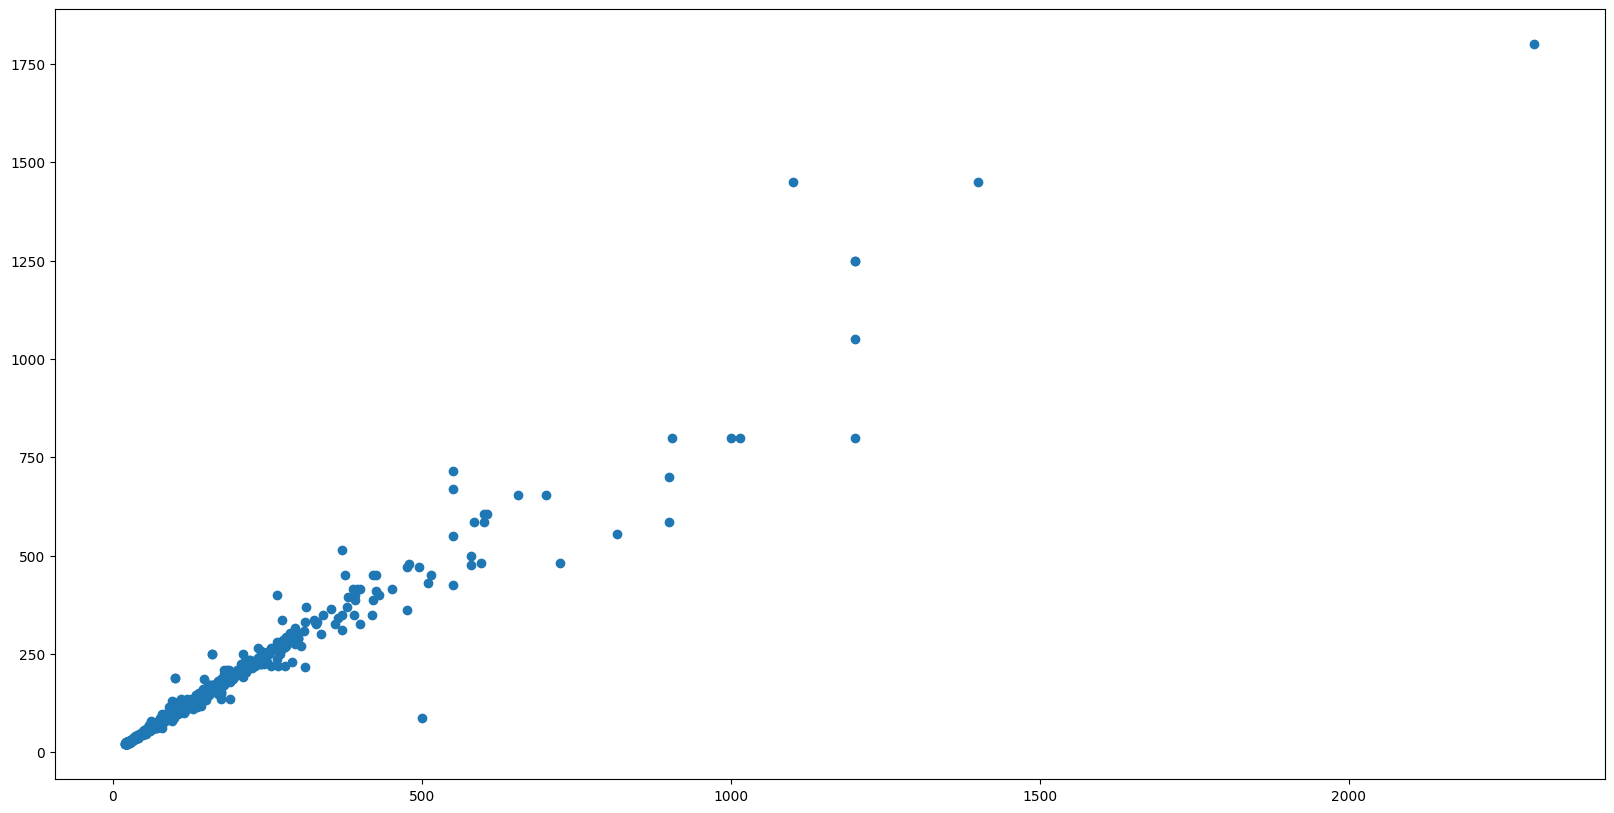

In [128]:
plt.scatter(Y_test,y_pred);

In [129]:
pickle.dump(model, open('mumbai_house_prices_prediction.pkl','wb'))

In [130]:
def predict_house_price(Location,Area,bhk,Gymnasium,Lift):
  loc_index = np.where(X.columns==Location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = Area
  x[1] = bhk
  x[2] = Gymnasium
  x[3] = Lift
  if loc_index >=0:
    x[loc_index] = 1

  model1 = pickle.load(open('mumbai_house_prices_prediction.pkl','rb'))

  return model1.predict([x])[0]

In [131]:
import json
def predict_house_price(Location,Area,bhk,Gymnasium,Lift):
    # data = request.json
    # Location,Area,bhk,Gymnasium,Lift = data['location'], data['area'], data['bhk'], data['gym'], data['lift']
    with open('columns.json', 'r') as file:
        columns = json.load(file)
    loc_index = np.flatnonzero(np.array(columns["data_column"]) == Location)
    print(type(loc_index))
    x = np.zeros(len(columns["data_column"]))
    print(len(columns["data_column"]))
    x[0] = Area
    x[1] = bhk
    x[2] = Gymnasium
    x[3] = Lift

    if loc_index >=0:
        x[loc_index] = 1
    return str(model.predict([x])[0])

In [132]:
print('₹',predict_house_price('Virar West',1500,2,0,1),'lakhs') 

<class 'numpy.ndarray'>
140
₹ 26.0 lakhs


# json

In [133]:
import json
columns={'data_column' :[col for col in X.columns]
         }
with open("columns.json","w") as f:
  f.write(json.dumps(columns))

In [134]:
location = {}

In [141]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle as pkl
import seaborn as sns
import numpy as np

rfc = RandomForestRegressor()

data = pd.read_csv('Mumbai1.csv')

le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])
data['Price'] = np.log(data['Price'])

x = data.drop(["Unnamed: 0","Price","Clubhouse","Indoor Games","Jogging Track", "Car Parking",'New/Resale', "Maintenance Staff","24x7 Security", "Children's Play Area", "Intercom",'Swimming Pool','Gas Connection', "Landscaped Gardens"], axis =1)
y = data['Price']

q1 = x['Area'].quantile(0.25)
q3 = x['Area'].quantile(0.75)

iqr = q3-q1

u = q3 + 1.5*iqr
l = q1 - 1.5*iqr

out1 = x[x['Area'] < l].values
out2 = x[x['Area'] > u].values

x['Area'].replace(out1,l,inplace = True)
x['Area'].replace(out2,u,inplace = True)

# Price
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)

iqr = q3-q1

u = q3 + 1.5*iqr
l = q1 - 1.5*iqr

out1 = y[y < l].values
out2 = y[y > u].values

y.replace(out1,l,inplace = True)
y.replace(out2,u,inplace = True)


x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, train_size=0.3)

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(r2_score(y_test,y_pred))

pkl.dump(rfc, open('model.pkl','wb'))

0.827476507059101


In [143]:
x = [1223,156,3,0,1]
x = np.array(x)
features = ['Area', 'Location', 'No. of Bedrooms', 'Gymnasium', 'Lift Available']
x = pd.DataFrame([x], columns=features)
rfc.predict(x)[0]

np.float64(16.955449913779532)

In [144]:
x_train

,Area,Location,No. of Bedrooms,Gymnasium,Lift Available
1959,663,115,2,0,1
5319,580,39,1,0,1
4025,1055,120,2,1,1
3506,976,342,2,1,1
3897,1980,15,4,1,1
...,...,...,...,...,...
4931,540,357,1,0,0
3264,1025,179,2,1,1
1653,1055,289,2,0,1
2607,340,170,1,0,0


In [138]:
data = pd.read_csv('Mumbai1.csv')
data['Code'] = le.fit_transform(data['Location'])
x = data[['Location','Code']]
location_code_dict = data.set_index('Location')['Code'].to_dict()

print(location_code_dict)

{'Kharghar': 136, 'Sector-13 Kharghar': 288, 'Sector 18 Kharghar': 262, 'Sector 20 Kharghar': 269, 'Sector 15 Kharghar': 258, 'Dombivali': 67, 'Churchgate': 51, 'Prabhadevi': 230, 'Jogeshwari West': 107, 'Kalyan East': 114, 'Malad East': 169, 'Virar East': 374, 'Virar': 373, 'Malad West': 170, 'Borivali East': 38, 'Mira Road East': 179, 'Goregaon West': 86, 'Kandivali West': 119, 'Borivali West': 39, 'Kandivali East': 118, 'Andheri East': 14, 'Goregaon East': 85, 'Wadala': 379, 'Ulwe': 348, 'Dahisar': 55, 'kandivali': 394, 'Goregaon': 83, 'Bhandup West': 30, 'thakur village kandivali east': 406, 'Santacruz West': 246, 'Kanjurmarg': 120, 'I C Colony': 101, 'Dahisar W': 57, 'Marol': 175, 'Parel': 216, 'Lower Parel': 157, 'Worli': 386, 'Jogeshwari East': 106, 'Chembur Shell Colony': 50, 'Central Avenue': 43, 'Chembur East': 49, 'Diamond Market Road': 63, 'Mulund': 182, 'Nalasopara West': 193, 'raheja vihar': 401, 'Powai Lake': 229, 'MHADA Colony 20': 159, 'Tolaram Colony': 346, 'Taloja': 

In [139]:
import pandas as pd
import numpy as np

# Assuming 'feature_names' is a list of column names used during training
feature_names = ['feature1', 'feature2', 'feature3']  # Replace with your actual feature names
X = np.array([['jph','89','56'],['dfdgv','sfd','sf']])
# Convert the NumPy array to DataFrame
X_df = pd.DataFrame(X, columns=feature_names)
X_df


,feature1,feature2,feature3
0,jph,89,56
1,dfdgv,sfd,sf
